## Загрузка

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"polinacher","key":"a241d6c303b034abeb741c7c5796777c"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d polinacher/diamonds-clear

  0% 0.00/470k [00:00<?, ?B/s]
100% 470k/470k [00:00<00:00, 150MB/s]


In [ ]:
! unzip  '/content/diamonds-clear.zip' -d '/content/diamonds-clear'

Archive:  /content/diamonds-clear.zip
  inflating: /content/diamonds-clear/diamonds_clear.csv  


## Подготовка

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import seaborn as sns

sns.set(style="white")
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

sns.set(style="white")
matplotlib.style.use('ggplot')
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/diamonds-clear/diamonds_clear.csv')
df

,carat,cut,color,clarity,depth percentage,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336.0,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
42930,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
42931,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
42932,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
42933,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


In [ ]:
df = df.drop('table', axis = 1)
df = df.drop('depth percentage', axis = 1)

df = df.drop('color', axis = 1)
df = df.drop('cut', axis = 1)
df = df.drop('length', axis = 1)
df = df.drop('depth', axis = 1)

labelencoder = LabelEncoder()

def MultiColumnLabelEncoder(columns, df):
    X = df.iloc[:].values
    for i in range(len(columns)):
        X[:, columns[i]] = labelencoder.fit_transform(X[:, columns[i]])
    df = pd.DataFrame(X, columns=df.columns, index = df.index)
    return df

columns = [1, 2, 3]
df = MultiColumnLabelEncoder(columns,df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df

,carat,clarity,price,width
0,0.016667,0.428571,0.000000,0.052995
1,0.005556,0.285714,0.000000,0.023041
2,0.050000,0.714286,0.000116,0.110599
3,0.061111,0.428571,0.000232,0.138249
4,0.022222,1.000000,0.000347,0.048387
...,...,...,...,...
42930,0.288889,0.285714,0.263841,0.463134
42931,0.288889,0.285714,0.263841,0.460829
42932,0.277778,0.285714,0.263841,0.444700
42933,0.366667,0.428571,0.263841,0.546083


In [ ]:
y = df['price'] # целевая переменная
df = df.drop('price', axis = 1)
df

,carat,clarity,width
0,0.016667,0.428571,0.052995
1,0.005556,0.285714,0.023041
2,0.050000,0.714286,0.110599
3,0.061111,0.428571,0.138249
4,0.022222,1.000000,0.048387
...,...,...,...
42930,0.288889,0.285714,0.463134
42931,0.288889,0.285714,0.460829
42932,0.277778,0.285714,0.444700
42933,0.366667,0.428571,0.546083


In [ ]:
data = list(df.columns)
data

['carat', 'clarity', 'width']

In [ ]:
X = pd.DataFrame(df, index = df.index, columns = df.columns) # данные для предсказания
X

,carat,clarity,width
0,0.016667,0.428571,0.052995
1,0.005556,0.285714,0.023041
2,0.050000,0.714286,0.110599
3,0.061111,0.428571,0.138249
4,0.022222,1.000000,0.048387
...,...,...,...
42930,0.288889,0.285714,0.463134
42931,0.288889,0.285714,0.460829
42932,0.277778,0.285714,0.444700
42933,0.366667,0.428571,0.546083


In [ ]:
# разделение датасета
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)# stratify = y

## Линейная регрессия

In [ ]:
model = LinearRegression()

parameters = {'fit_intercept': [True, False], # включение или исключение свободного члена в уравнении регрессии
              'positive': [True, False]} # улевый параметр, указывающий, должны ли предсказанные значения быть положительными

grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) # среднеквадратичная ошибка, измеряет среднюю квадратичную разницу между фактическими и предсказанными значениями, показывает точность предсказания для всех наблюдений
r2 = r2_score(y_test, y_pred) # коэффициент детерминации, измеряет долю дисперсии зависимой переменной,объясненную моделью, показывает насколько идеально модель предсказывает зависимую переменную

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

print("\n\nFeature coefficients:")
coeffs = dict(zip(data, best_model.coef_))

for name, weight in coeffs.items(): #  веса (коэффициенты) для каждого признака после обучения линейной регрессии
  print(f'{name}: {weight}')

Best Parameters: {'fit_intercept': True, 'positive': True}
Mean Squared Error: 0.0076267612494713985
R-squared: 0.8895319246082147


Feature coefficients:
carat: 1.2505513348940693
clarity: 0.13740964336759365
width: 0.0


Evaluation of a free member:  -0.14201405746874568


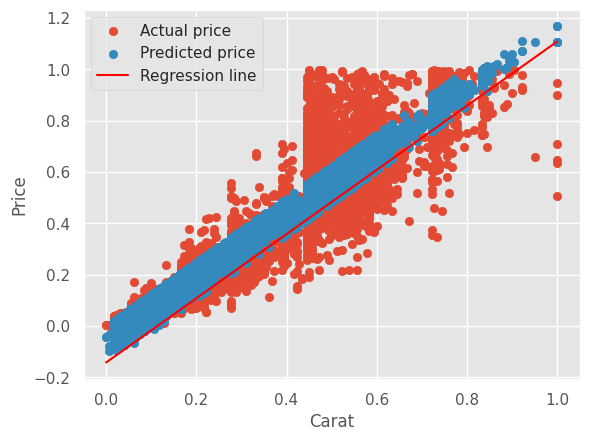

In [ ]:
coefficients = best_model.coef_.ravel() # получение коэффициентов (весов) модели
intercept = best_model.intercept_ # получение значения свободного члена
print('Evaluation of a free member: ', intercept)

# Прямая
x_line = np.linspace(min(X_test['carat']), max(X_test['carat']), 100)
y_line = intercept + coefficients[0] * x_line

# График
plt.scatter(X_test['carat'], y_test, label='Actual price')
plt.scatter(X_test['carat'], y_pred, label='Predicted price')
plt.plot(x_line, y_line, color='red', label='Regression line')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()

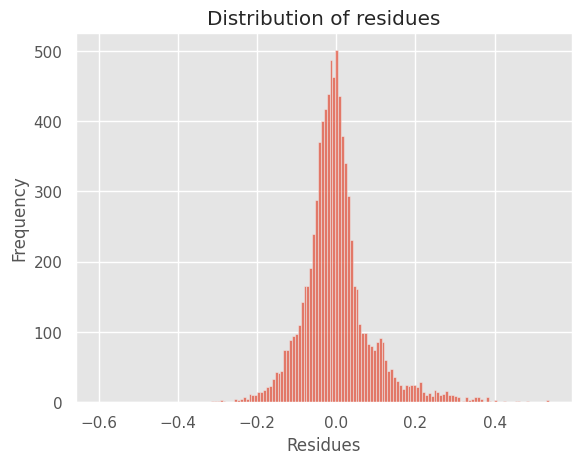

In [ ]:
# Вычисляем остатки
residuals = y_test - y_pred

# Построение гистограммы остатков
plt.hist(residuals, bins='auto', alpha=0.7)
plt.xlabel("Residues")
plt.ylabel("Frequency")
plt.title("Distribution of residues")
plt.show()

## Лассо

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Создание объекта модели LASSO регрессии
lasso_model = Lasso()

# Определение параметров для подбора
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Подбор параметра alpha
grid_search.fit(X_train, y_train)

# Вывод оптимального значения alpha
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}') # штраф на сумму абсрлютных хначений коэффициентов

# Обучение модели с оптимальным значением alpha
best_model = Lasso(alpha=best_alpha)
best_model.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = best_model.predict(X_test)

# Производительность модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

print("\n\nFeature coefficients:")
coeffs = dict(zip(data, best_model.coef_))
for name, weight in coeffs.items():
  print(f'{name}: {weight}')

Best alpha: 0.001
Mean Squared Error: 0.007682539852840116
R-squared: 0.8887240122112441


Feature coefficients:
carat: 1.191234623079823
clarity: 0.11601184876757015
width: 0.02828956026818474


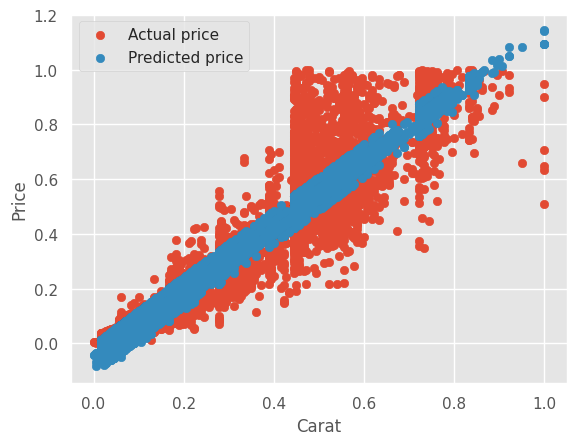

In [ ]:
plt.scatter(X_test['carat'], y_test, label='Actual price')
plt.scatter(X_test['carat'], y_pred, label='Predicted price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()

## Ридж-регрессия

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

ridge_model = Ridge()

param_grid = {'alpha': [0.1, 1.0, 10.0]}

grid_search = GridSearchCV(ridge_model, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

best_model = Ridge(alpha=best_alpha)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best alpha: {best_alpha}') # штраф на сумму квадратов коэффициентов
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

print("\n\nКоэффициенты признаков:")
coeffs = dict(zip(data, best_model.coef_.tolist()))
for name, weight in coeffs.items():
  print(f'{name}: {weight}')

Best alpha: 0.1
Mean Squared Error: 0.0076265684261468125
R-squared: 0.8895347175134678


Коэффициенты признаков:
carat: 1.260261964708718
clarity: 0.13730760869962524
width: -0.009156532915338347


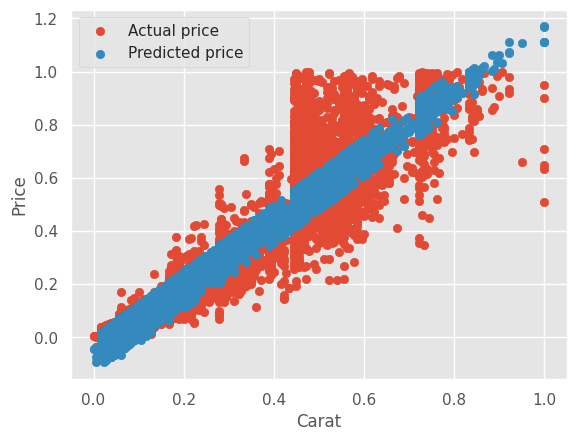

In [ ]:
plt.scatter(X_test['carat'], y_test, label='Actual price')
plt.scatter(X_test['carat'], y_pred, label='Predicted price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()